In [1]:
### Uncomment and install the following line if there is an error in 1.2.
# %pip install --upgrade plotly

In [2]:
# Just run this cell. 
import numpy as np
# plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# import seaborn as sns
from scipy.optimize import curve_fit
from ipywidgets import interact, FloatSlider

from hidden import *

# Model Building

In this notebook, you will work with timeseries data, starting with no other context. Your goal is use the raw data to build up to a robust model. We ask that you complete the content of this notebook linearly for the best learning experience. By the end of this module, you'll dive into the following concepts

- What it means to model a set of data
- Why we choose one model over another
- How to make predictions from a model
- When and how to improve a model
- How to detect a signal using a model
- How to combine model predictions and Hill's criteria to make policy recommendations

## Part 1: Pre-lab 

The following are a set of data collected within a certain range of time. We can fit different models (mathematical functions) to it.

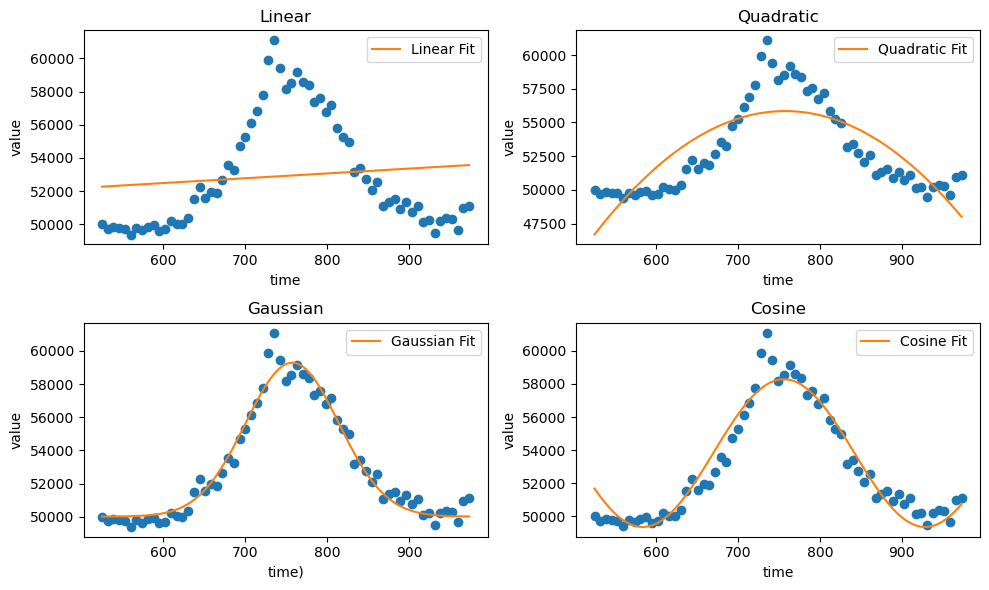

In [3]:
# Just run this cell. 
fit_pre_lab_models()
plt.show()

**Question 1.1:** Looking at the four fitted models (linear, quadratic, Gaussian, cosine), which model(s) seem to capture the trend better?

_Replace this with your answer._

**Question 1.2:** A main purpose of a model is to help us make predictions. Suppose you have two models that fit data within this time range equally well. How would you decide which model is _actually_ more accurate?

_Replace this with your answer._ 

Now we'll show more of the data and see how the respective fitted models look now. 

**Question 1.3:** Now, looking at data collected over a larger range of time. Which of the four models now best capture(s) the overall trend? In other words, which model fits the data outside of the range just as well as inside? **[Hint: There's more than one!]**

_Replace this with your answer._

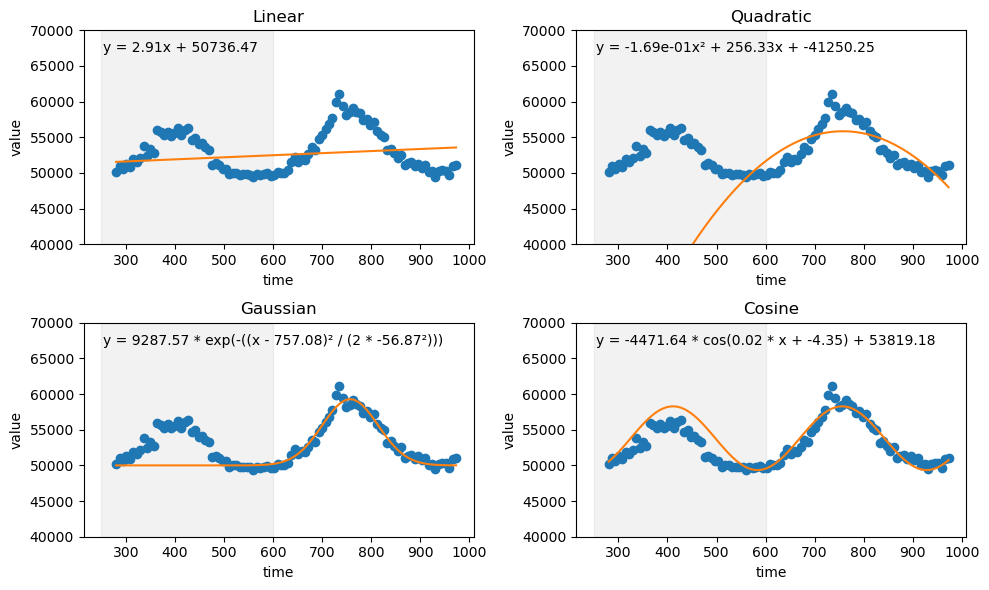

In [4]:
# Just run this cell. The gray portion represents the added data. 
expanded_plot() 

**Takeaway:** When we are choosing between two models that both work well in some range, we should compare their predictions outside of the given range with reality. For a model to capture the overall trend, it
needs to do just as well outside of this range as inside.

**Question 1.4**: Now extend each of the models to give a prediction of the value at x = 1200, along with a very rough error bar (i.e. 90% confident that the true data point at x=1200 lies within this range). (Hint: use the formulas of the best-fit models and use linear and cosine separately to find the predictions. To estimate the error bar, see how far the data typically deviates along the y-axis from the mode.)

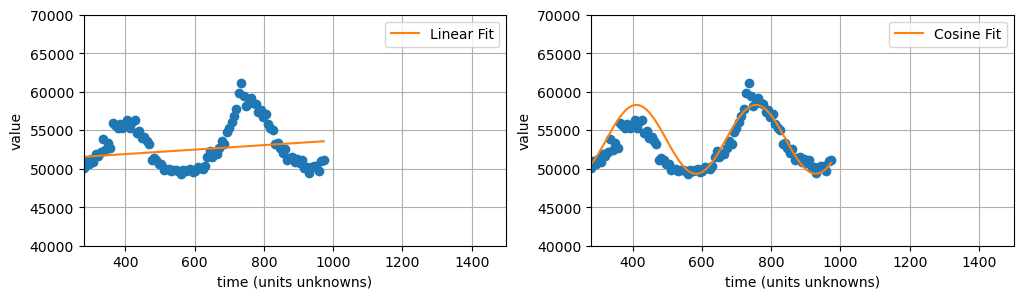

In [5]:
plot_linear_cosine(12,3)

**Linear:**  $ y = 2.91x + 50736.47 $

**Cosine:**  $ y = -4471.764 \cdot \cos(0.02x - 4.35) + 53819.10 $


[Move this down] The cosine function is defined as $ y = A \cdot \cos(Bx + C) $, $A$ is the amplitude, $ \text{period} = \frac{2\pi}{B} $, $C$ is the horizontal shift, and $D$ is the vertical shift.

In [6]:
# You can use this cell to run your calculations
linear_at_1200 = ...
cosine_at_1200 = ...

_Edit this markdown cell and report your answer for each item below._

- Prediction for cosine model: 
- Rough error bar for cosine: 
- Error bar for linear:
- Error bar for linear: 

The linear model is easier to calculate, but gives a larger error bar. The cosine model is much more accurate, but harder to compute. Often and for different purposes, it's okay to use a less accurate model.

**Question 1.5**: Can you guess what the data represents?

_Replace this with your answer._

**Question 1.6**:  Use the formulas provided of the models to make a prediction of y at x=1200. Give 90% confidence interval for the **linear model**. 

_Replace this with your answer._

**Question 1.7**:  Use the formulas provided of the models to make a prediction of y at x=1200. Roughly estimate the 90% confidence interval for the **cosine model**. **Hint**: Typically, how does the data fluctuate from the model curve -- your CI should be based on this deviation.

_Replace this with your answer._

**Takeaway**: The linear model is easier to calculate than the cosine model and has fewer parameters (two versus four). Even though the linear model fit is not the best, we can still make useful predictions using it, albeit less accurate.

___

## Part 2: The linear model

Now, we'll look at an even wider range of the full data. We will be using the crude linear model to make predictions and identify when something suprising happens, i.e when the data deviates a lot from the model.

Let's start by loading our data and storing the time values in `xdata` and values in `ydata`. Remember, no details about the context of the data will provided.

In [7]:
timeseries_data = get_data()
xdata = np.array(timeseries_data['time'])
ydata = np.array(timeseries_data['value'])

In this section of the notebook, we will visualize, analyze and fit our data to a model and investigate whether our model is good. To begin, let's plot our timeseries data. You'll recognize parts of this data from the pre-lab above.


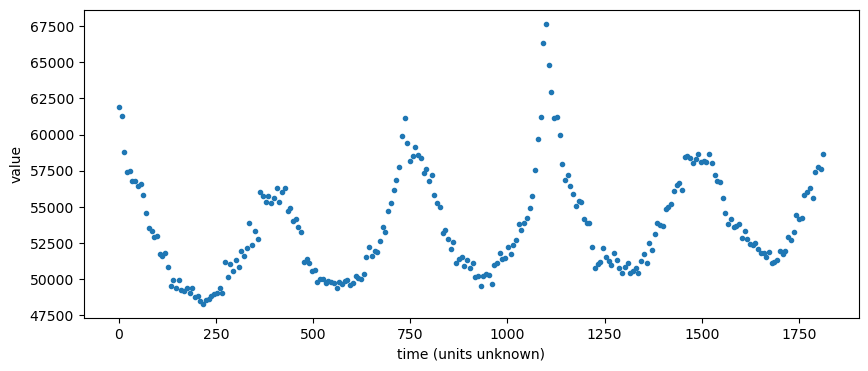

In [8]:
plt.figure(figsize=(10, 4)) 
plt.plot(xdata, ydata, '.')
plt.xlabel('time (units unknown)') 
plt.ylabel('value')
plt.show()

We will create a linear model, that asssumes, despite the ups and downs in the data, there's an average value that represents the entire dataset reasonably well over time. Recall from the prelab that even a very crude model can be very useful.

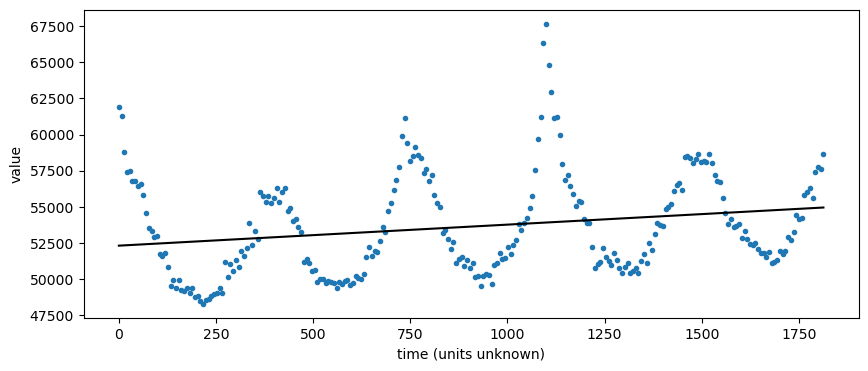

In [26]:
popt, _ = curve_fit(linear_model, xdata, ydata)
m_fit, c_fit = popt

plt.figure(figsize=(10, 4))
plt.plot(xdata, ydata, '.')
plt.plot(xdata, linear_model(xdata, m_fit, c_fit), color="black")
plt.xlabel('time (units unknown)')
plt.ylabel('value')
plt.show()

Potentially define threshold for students as a way to describe the width of the band.

In [10]:
plot_lin_band()

interactive(children=(IntSlider(value=1, description='± deviation from model', max=15000, step=10), Output()),…

Outside of this range, we want to make prediction. We'll reveal the true nature of the data soon.

For now, pretend the data is about the seasonal hare population on some island and the time is in weeks. We need to know when something abnormal happens to the hare population at some later time. That means we need to give a range of values in which the hare population is normal and if a future hare population value is outside of this range, then we can say something suprising happened to our hares.

**Question:** Using the percentages below, adjust the slider to find what is the amount of deviation from the model within which 90% of the data lies? 

- 68%:
- 80%:
- 95%:

**Takeaway:** If a future value, say t = 2000, falls outside the 95% band, then we can be 95% sure that something abnormal has happened, in this example to the hares. In other words, there is only a 5% chance that this far-from-threshold value can arise by chance based on our model.

**Question:** Set `deviation_at_95_percent` to the value you found in the question above.

In [11]:
deviation_at_95_percent = 6100

Now, some time has passed and we have collected a couple more points of data, and it seems like something suprising has happened. We can say this precisely using statistics!

In [12]:
# %matplotlib notebook

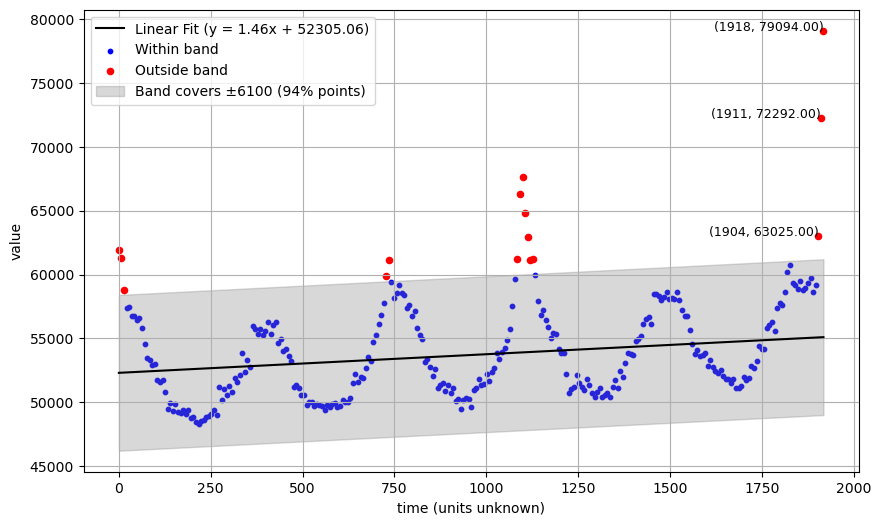

In [13]:
plot_lin_all(deviation_at_95_percent) # To do: Cut off 2 points after the first alarm

Now we will plot the  rest of the data, put in threshold values to the value you obtained above the function below that will plot threshold band and show the red points.

**Question:** From the plot above, at what time value does our new data start to deviate significantly from the model? This is when you should alarm the wildlife biologists about the hare population. 

In [14]:
# Replace the ... with the time value you identified
time_value = 1904

**This data is not about the hare population. In fact, it is about the total number of deaths in the United States in any given week.**

As a statistician at the CDC, your job has been to moniter this data. You've found this date where the weekly death count has surpassed your threshold (outside the band), what would you report to your superior? Include the statement of fact and your credence level. 

_Replace this with your answer_

Answer: At the threshold we choose, we would sound At 95%, in every 20 alarm, there is one that is false positive. On average, you would have 2.5 false alarms.

**Takeaway:** We started by fitting our data to a crude linear model. Then identified a threshold at which we can signal that something unexpected has happened. 

## Part 3: Refining the model

We used our very crude linear model to make a real world alarm for weekly deaths in the US. But obviously the model was very crude. Can we do better?

There is a periodicial fluctuation that is not captured by linear model. How to we systematically show that there are still patterns that have not been captured by the model we have chosen?

To do that, We have to know how precisely the data was collected. In other words, we need to estimate the measurement error of our data.

The approach we will use is evaluating goodness of fit, checking whether our data is likely to be from a specific theoretical distribution we've defined. For example, you may have seen or worked with tests such as chi-square or coefficient of determination (R-squared). Our approach will involve using error bars and we will walk through why first.

**Question:** Let's say our model is the true number of deaths and the observed points fluctuate due to uncertainty and error. What are some examples of sources of uncertainity and/or error?

_Replace this with your answer._

For each point, we are 68% confident that was true death count value was +/- 1000 deaths (i.e. a 68% error bar). As you may have described above, some deaths go unaccounted for, are registered in following weeks, and other are influenced by other factors that introduce error. The justification we will move forward with is that for every 1000 people who die, there are 2 clerical mistakes (creating roughly +/- 1000 deaths given that our average is 53600 deaths a week). Here's what that looks like.

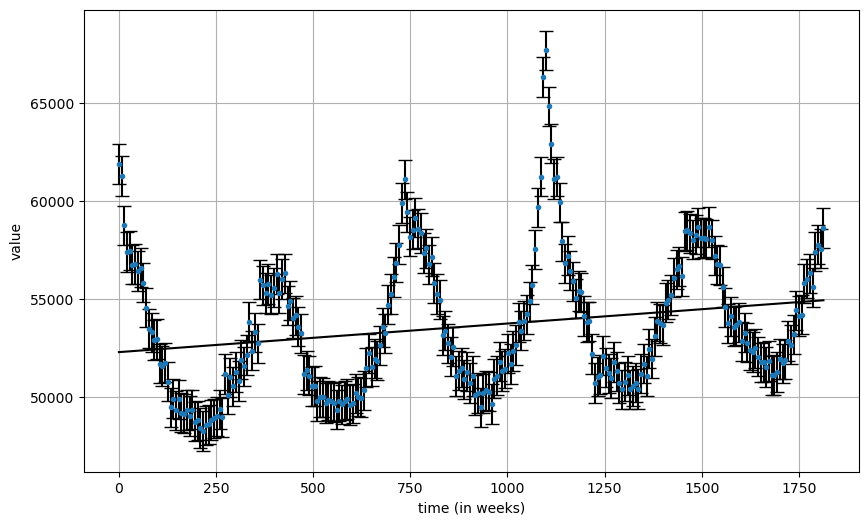

In [34]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=1000, fmt='.', ecolor='black', capsize=5)
plt.plot(xdata, linear_model(xdata, m_fit, c_fit), '-', label='fit', color = "black")
plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.grid(True)
plt.show()

**Question**: When we create our model, we want it to pass close to about 68% of our data points. Answer why you think so below. In your response, consider what it means about our model if our line doesn't pass through roughly 68% of our data? What if passes through more than 68% of points?

_Replace this with your answer._

Now, let's actually calculate that percent.

In [38]:
yerr = 1000 # This is the +/- 1000 given to you. 

lin_mod = linear_model(xdata, m_fit, c_fit)
error_bar_passes = ((lin_mod >= (ydata - yerr)) & (lin_mod <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The linear model passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

The linear model passes through 44 error bars out of 260 points.
Percentage: 16.92%


**Question:** Based off the percent of error bars, do you think we should add more complexity or is our model? Explain your reasonsing. 

_Replace this with your answer._

**Takeaway**: We should expect our model to capture 68% of the points because our confidence in data point true value is 68% (hence 68% error bars). Because our model does not capature 68% of the points, there is room to refine our model to capture more of those data points. 

From the linear model we have captured slowly rising trend in our data. Let's add a cosine curve on top of the linear model to also capture the periodic fluctuations. Below is the model equation (you can think of it as a cosine curve with a tilt).

$$
f(x) = A \cos\left(\frac{2\pi}{T}(x-x_0)\right) + Bx + C
$$

Heads up, we will see if these paramters make sense (i.e. should find that a year is 365 days) later in the notebook.

In [39]:
plot_tilted_band()

interactive(children=(IntSlider(value=1, description='± deviation from model', max=15000, step=10), Output()),…

Show that the improvement is adding the cosine to hit 90% of the error vars.

The linear curve captures the biggest trend, but there is clearly also a smaller wavy trend. (Long term trend vs short-term fluctuation.)

We have the D, E for the tilt from the linear model. Show how to paramterize the tilted cosine model and plot. Add the tune and tilt of they want as the default values.

Give the number of error bars now - this is a great improvement, but we're not there yet. Iterative progress!

The whole threshold story, the whole data.

Though the two models performed the same, can you imagine a hypothetical situation where a suprising excess death count would be better cpature by our cosine model but the linear model. 

Hint: Think about the shape of our bands. 

Answer: On the way down.

### 1.2 Adding More Parameters

**Question 1.2.1**: Based on the model you built above, describe what patterns and trends you notice? What mathematical function do you know that best mimics the pattern applied to the data above?

_Replace this with your answer._

NameError: name 'fit_linear' is not defined

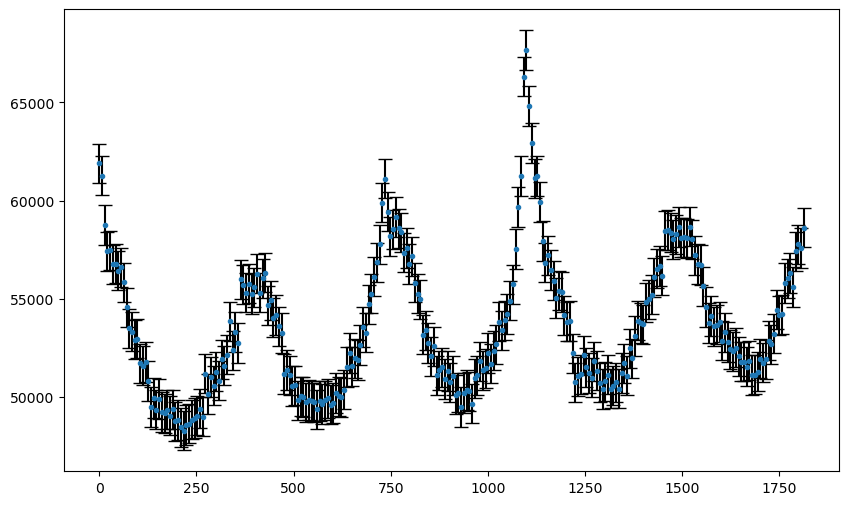

In [18]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=1000, fmt='.', label='data', ecolor='black', capsize=5)
plt.plot(xdata, fit_linear, '-', label='fit')
plt.legend()

plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.grid(True)
plt.show()

One function we can use is the cosine function, a good choice when working with data that looks periodical (i.e. occurs in phases).

$$
f(x) = A \cos(B(x - C)) + D
$$

Providing initial guesses for more complex models can help guide the computational process towards a more accurate and efficient solution. Use the widget below to experiment with what you can use as your intial guesses for the parameters A, B, C, and D. Don't worry about fitting the perfect model, a rough start is to get started will be good enough for our optimizing function later!

_For reference, we can interpret the parameter **A** as the amplitude (the vertical distance from the top of a peak to the center line), **B** as the parameter that controls the width of the wave (how wide or narrow a wave is), **C** as the parameter that represents the horizontal shift, and the constant **D** represents a vertical shift (moving the whole model up or down)._

In [15]:
#Just run this cell.
cosine_widget()

interactive(children=(FloatSlider(value=0.0, description='A', max=10000.0, readout_format='.0f', step=1.0), Fl…

**Question 1.2.2**: Assign the values you choose for A, B, C, and D to `guess`, in that order, as a list. 

In [16]:
guess = [4000, 0.02, 20, 54000] 

Using the values for A, B, C, and D above as our guesses, let's find the best parameters that minimize error. This may be unfamiliar, but we will leverage `curve_fit` function from the scipy.optimize library which finds the best fit model (given we provide good starting point), doing most of the heavylifting for us. You can read the documentation here for [curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) if you're curious.

**Question 1.2.3**: Fill in the code for `cos_func` which the specific shape of our curve given some paramters. Then, use that to define `fit_cosine`, which is the model that will be plotted over the data.

_Hint: You'll know your guesses were good if the model is nicely fit to the data._

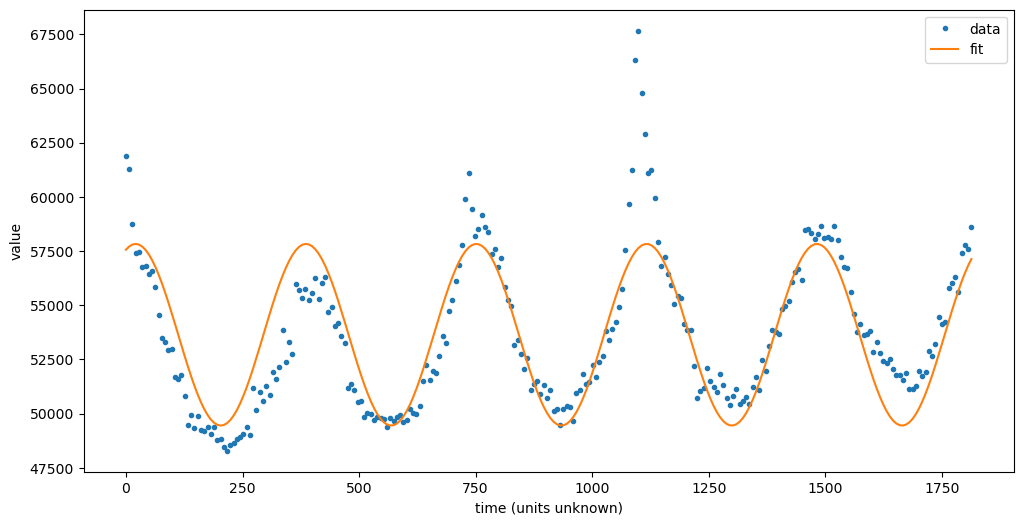

In [17]:
# Decide what students should code here, how much scaffolding should be given.
plt.figure(figsize=(12, 6)) 

def cos_func(x_data, A, B, C, D):
    # REPLACE ... WITH YOUR CODE
    return A * np.cos(B*(x_data - C)) + D


#Here, curve_fit finds the best values for each parameter of our model. Do not change this part of the code.
parameters, _ = curve_fit(cos_func, xdata, ydata, p0=guess) 
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]

# REPLACE ... WITH YOUR CODE
fit_cosine = cos_func(xdata, fit_A, fit_B, fit_C, fit_D)

# DO NOT CHANGE THIS CODE
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.xlabel('time (units unknown)')
plt.ylabel('value')

plt.legend()
plt.show()

Nice! Our model looks more accurate to our data now. 

### 1.3 Evaluating goodness of fit

With more parameters, our model looks better fit to the data. However, it's crucial to ask if the chosen model, like a cosine function in this case, truly reflects the underlying patterns of the data. Do we need to make the model more complex or do we have too many parameters and risk overfitting? How can we determine if what we have right now is a good model? -- remove

_Use this space to write down any ideas you have_

The approach we will use is evaluating goodness of fit, checking whether our data is likely to be from a specific theoretical distribution we've defined. For example, you may have seen or worked with tests such as chi-square or coefficient of determination (R-squared). Our approach will involve using error bars and we will walk through why first.






**New information!: The data we are working with is about historical weekly death counts in a large country. Week 0 is some start date and the following values represent the subsequent weeks in the time period.**

**Question 1.3.1:** Let's say our model is the true number of deaths and the observed points fluctuate due to uncertainty and error. What are some examples of sources of uncertainity and/or error? Answer in the context of what is revealed in the new information above.

_Replace this text with your answer_

**Question 1.3.2:** The CDC **change** didn’t provide us the error bars, so as good scientists, we should look. What do you expect this range to be? Consider what you wrote in the question above and try to estimate the systematic or statistical uncertainty?

_Replace this text with your answer_

For each point, we are 68% confident that was true death count value was +/- 1000 deaths (i.e. a 68% error bar). As you may have described above, some go unaccounted for, are registered in following weeks, and other factors that influence error. The justification we will move forward with is that for every 1000 people who die, there are 2 clerical mistakes (creating roughly +/- 1000 deaths given that our average is 53600 deaths a week). Here's what that looks like. ADD: random chance between days

**Question 1.3.3**: When we create our model, we want it to pass close to about 68% of our data points. Answer why you think so below. In your response, consider what it means about our model if our line doesn't pass through roughly 68% of our data? What if passes through more than 68% of points?

In [ ]:
#For me: Error bars are based of themeasurement process. Modeling the clerical error would elimate the need to have the error bars at the scale we chose. 

_Replace this text with your answer_

Now, let's actually calculate that percent.

**Question 1.3.4**: Fill in the following code to calculate the percent of error bars our model passes through. Set that value equal to `percentage_passes`. You might find it helpful to use `fit_cosine`, `yerr`, `ydata`, and `xdata` in your answer. 

In [ ]:
yerr = 1000 # This is the +/- 1000 given to you. 

# REPLACE ... WITH YOUR CODE
error_bar_passes = ((fit_cosine >= (ydata - yerr)) & (fit_cosine <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

**Question 1.3.5**: Based off the percent of error bars, do you think we should add more complexity? If so, what pattern in the errors do you notice that we could address (Hint: consider what you did in Part 1.1).

_Replace this text with your answer_

We will add a tilt to our cosine model, such that new model is modelled by a combination of the cosine and linear components. Specifically, _D_ now represents the coefficient of the linear term and _E_ represents the y-intercept of the linear term.

$$
f(x)=A\cos(Bx+C)+D+Ex 
$$

**Question 1.3.6**: Let's apply what we did in 1.2.3 to our new model with the additional parameter. Then, calculate the new percent of error bars that the fitted model passes through. 

In [ ]:
def tilted_cosine(x, A, B, C, D, E):
    # REPLACE ... WITH YOUR CODE
    return A * np.cos(B * x + C) + D * x + E

    
initial_guess = [max(ydata) - min(ydata), np.pi/200, 0, 0, np.mean(ydata)]

parameters, _ = curve_fit(tilted_cosine, xdata, ydata, p0=initial_guess)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]
fit_E = parameters[4]

# REPLACE ... WITH YOUR CODE
fit_data_with_tilt = tilted_cosine(xdata, fit_A, fit_B, fit_C, fit_D, fit_E)

# DO NOT CHANGE 
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=1000, fmt='.', label='data', ecolor='black', capsize=5)
plt.plot(xdata, fit_data_with_tilt, '-', label='fit')
plt.legend()
plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.grid(True)
plt.show()

In [ ]:
yerr = 1000 

# REPLACE ... WITH YOUR CODE
error_bar_passes = ((fit_data_with_tilt >= (ydata - yerr)) & (fit_data_with_tilt <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

Takeaway: We have accurately modeled the weekly deaths up to statistical uncertainties that we know that exist, assuming we have done the error bar estimations correctly.  Any further modeling would have to incorportate modeling the sources of these uncertainties.  

<!-- **Question 1.3.7**: What did adding more complexity to our model do? How do you now feel about calling our current model "a good model"? -->

_Replace this text with your answer_

## Part 3: Finding a signal

Now that we have a reasonable model, let's investigate what data point deviations are reasonable and which ones are not. 

Let's remind ourselves what the data and the model we built in the previous part looks like. 

In [ ]:
#Just run this cell.
plt.figure(figsize=(12, 6)) 
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xdata, fit_data_with_tilt, '-', label='fit')
plt.xlabel('time (in weeks)')
plt.ylabel('value')

### 2.1 Determining a threshold

**Question 2.1.1:** Fill in the following code cell to calucate our model's redisuals and make a residual plot. 

In [ ]:
model_residuals = ydata - fit_data_with_tilt #Code to fill in. 
plt.figure(figsize=(12, 6))
plt.plot(xdata, model_residuals, '.')
plt.xlabel('time (in weeks)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

**Question 2.1.2:** What do you notice about our residual plot? What does this say about the complexity of our model?


_Replace this text with your answer_

To determine the percentage of data points that deviate significantly from the fitted line, we need to establish a threshold. This threshold can be a multiple of the standard deviation (SD) of the residuals. Use the widget below to play around with different threshold values until you find a threshold you feel comfortable with.

In [ ]:
# Should we make this hidden?
std_dev_residuals = np.std(model_residuals)

def update_plot(threshold_factor):
    threshold = threshold_factor * std_dev_residuals
    is_outlier = np.abs(model_residuals) > threshold

    plt.figure(figsize=(14, 7))
    plt.scatter(xdata, model_residuals, label='data', color='blue', s=10)
    outlier_points = np.array(xdata)[is_outlier]
    outlier_residuals = np.array(model_residuals)[is_outlier]
    plt.scatter(outlier_points, outlier_residuals, label='outliers', color='red', s=20)
    plt.axhline(0, color='grey', lw=0.8)
    plt.axhline(threshold, color='green', linestyle='--', lw=1, label=f'+{threshold_factor} SD ({threshold:.2f})')
    plt.axhline(-threshold, color='green', linestyle='--', lw=1, label=f'-{threshold_factor} SD ({-threshold:.2f})')
    plt.xlabel('time (in weeks)')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

slider = FloatSlider(value=1, min=0, max=5, step=0.1, description='Threshold SD:', readout_format='.1f')
interact(update_plot, threshold_factor=slider)
plt.show()

**Question 2.1.3:** What threshold did you choose? In your own words, what does this threshold represent in the context of the data (i.e what signal does a given week's excess death residual signal)?

_Replace this text with your answer_

### 2.2 Testing our model

We now have some new data to introduce. This data is chronlogically after the data we have built our model on and chosen our standard deviation cutoff from in the sections above. Let's see how our model holds up.

In [ ]:
# all_xdata = (excessdeaths['Week Ending Date'] - excessdeaths['Week Ending Date'].min()).dt.days
# all_ydata = excessdeaths['Number of Deaths'].values 
# all_xdata = np.asarray(all_xdata)
# all_ydata = np.asarray(all_ydata)

In [ ]:
# Just run this cell
all_xdata, all_ydata = get_all_data()

In [ ]:
plt.figure(figsize=(12, 6)) 

fit_cosine_all_data = tilted_cosine(all_xdata, fit_A, fit_B, fit_C, fit_D, fit_E)

plt.plot(all_xdata, all_ydata, '.', label='data')
plt.plot(all_xdata, fit_cosine_all_data, '-', label='fit')
plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.legend()
plt.show()

Our new data seems deviate significantly from our model. Let's also plot the residual model.

In [ ]:
all_data_residuals = all_ydata - fit_cosine_all_data

plt.figure(figsize=(12, 6))
plt.plot(all_xdata, all_data_residuals, '.')
plt.xlabel('time (in weeks)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

Say we use a threshold of +/3 SD. Let's apply that to all our data now.

In [ ]:
threshold = 3 * std_dev_residuals
is_outlier = np.abs(all_data_residuals) > threshold

plt.figure(figsize=(14, 7))
plt.scatter(all_xdata, all_data_residuals, label='Data', color='blue', s=10)
outlier_points = np.array(all_xdata)[is_outlier]
outlier_residuals = np.array(all_data_residuals)[is_outlier]
plt.scatter(outlier_points, outlier_residuals, label='Outliers (> 3 SD)', color='red', s=30)
plt.axhline(0, color='grey', lw=0.8)
plt.axhline(threshold, color='green', linestyle='--', lw=1, label=f'+3 SD ({threshold:.2f})')
plt.axhline(-threshold, color='green', linestyle='--', lw=1, label=f'-3 SD ({-threshold:.2f})')
plt.xlabel('time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

What could explain this pattern? Let's find the first point in the **new added data** that is above our threshold.

In [ ]:
is_outlier = np.abs(all_data_residuals) > threshold
outlier_x_values = np.array(all_xdata)[is_outlier].tolist()

filtered_outlier_x_values = [x for x in outlier_x_values if x > 1850]
filtered_outlier_x_values[0]

**New Information: The first week in our timeseries of weekly excess death counts is January 10, 2015.**

**Question 2.2.1**: What is the date we first saw our new data go above the threshold? What is the signal suggesting? What was happening around this date?

In [ ]:
initial_date = pd.to_datetime('2015-01-10')

# Calculate the date 1904 weeks after this initial date
date_after_1904_days = initial_date + pd.Timedelta(days=1904)
date_after_1904_days

_Replace this text with your answer_

### 2.3 Interpreting our model in context

**Question 2.3.1:** In the context of the data, how would you define what is a signal? What could this signal mean to governments and policymakers?

_Replace this text with your answer_

**Question 2.3.2:** What might be some issues with our model? Name and explain at least two.

_Replace this text with your answer_ (Ex: We've been building a model as if any given year is the same, and that's not necessarily true.)

# Post-lab

## Reflection

Write some pros and cons of the linear and cosine model. The cosnine model has a smaller prediction level. IF w

- The cosine model has a smaller prediction level. If something bad happens, we can catch it more accurately. More complicated.
- The linear model has a larger prediction level. Less complicated.

** Want to emphasize the real world implications.  

## Part 4: Hill's Criteria

As of June 2023, [over 1 million people in have died from COVID-19 in the US](https://www.nfid.org/infectious-diseases/covid-19/) since the virus first emerged. Looking back now, it's obvious the massive increase in excess deaths we saw once we applied our model to our new data came from deaths related to COVID-19.  

However, without this hindsight, our national government asks what else could be causing this uptick before jumping the gun and alerting the whole nation. How do we know COVID-19 directly created more excess deaths? It is impossible to conduct an RCT and introduce the virus to some populations and not in others. Instead we can use Hill's Criteria to show compelling evidence that COVID-19 _causes_ excess mortality.

**Question 3.1:** For each of Hill's criteria, what evidence, if observed, would support that criterion?

- **Prior Plausability:** _Replace this text with your answer_
- **Temporality/Temporal Sequence:** _Replace this text with your answer_
- **Specificity:** _Replace this text with your answer_
- **Dose-response Curve:** _Replace this text with your answer_
- **Consistency Across Contexts:** _Replace this text with your answer_




## Part 5: Orders of Understanding  [try adding into the model building, no jargon]

Looking back, let's explore the order of understanding for each parameter we we added into our model.

- 1st order - the mean (caputured the data into a single number, what does a deviation from the linear mean), season fluctation, not random
- 2nd order – the fluctuation (pattern is captured by cosine, with three parameters), this capture more of the data pattern
- 3rd order – the drift (population growth) 

Creating a model can be complicated at first, but it can be built up slowly.

**Question 4.1**: When do we know when to stop? Consider if it is necessary or useful to know what each parameter means?


_Replace this text with your answer_

**Question 4.2**: Large langauge models (LLMS) are giant models with billions of parameters that are applied on a large amount of data for training and inference. What problems might we run into? 

_Replace this text with your answer_

## Estimate the total number of excess deaths


Calculate the excess 

Why hide the context? Blind analysis and avoid confirmation bias because we already know when COVID has happened.  